### Technical Analysis Moving Average Crossover Strategy

Whenever the fast MA crosses above the slow MA, it produces a buy signal. Later on, when the fast MA crosses
below the slow MA, it produces an exit signal.

FAST_MA > SLOW_MA = Buy/Long

FAST_MA < SLOW_MA = Sell/Exit

Comparison of benchmark (Standard Long hold strategy) and strategy (MA Crossover).

In [1]:
#import libraries
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#define variables
FAST_MA = 25
SLOW_MA = 150
STARTING_BALANCE = 10000

In [3]:
#define time period
START = datetime.datetime(2000, 1, 1)
END = datetime.datetime(2025, 2, 18)
YEARS = (END - START).days / 365

In [4]:
#load data into a pandas dataframe
ticker = "^GSPC"
price = yf.download(ticker, start=START, end=END)

price.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [5]:
#drop redundant columns
price = price.drop(['High', 'Low', 'Volume'], axis=1).reset_index()

price.head()

Price,Date,Close,Open
Ticker,,^GSPC,^GSPC
0,2000-01-03,1455.219971,1469.250000
1,2000-01-04,1399.420044,1455.219971
2,2000-01-05,1402.109985,1399.420044
3,2000-01-06,1403.449951,1402.109985
4,2000-01-07,1441.469971,1403.449951


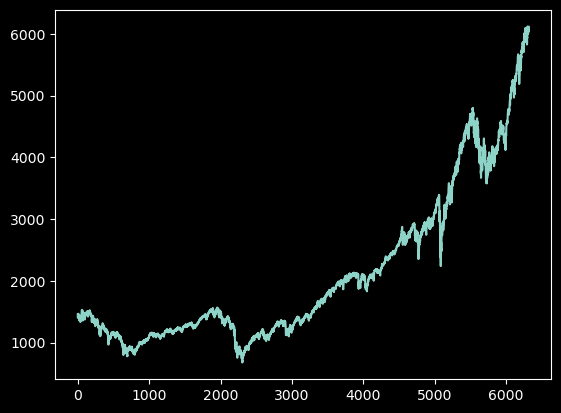

In [6]:
#plot of S&P500
plt.style.use('dark_background')
plt.plot(price.Close)
plt.show()

In [7]:
#calculate daily return
price['Return'] = price.Close / price.Close.shift(1)

price['Bench_Bal'] = STARTING_BALANCE * price.Return.cumprod()

price.tail()

Price,Date,Close,Open,Return,Bench_Bal
Ticker,,^GSPC,^GSPC,,
6314,2025-02-10,6066.439941,6046.399902,1.006713,41687.442885
6315,2025-02-11,6068.500000,6049.319824,1.000340,41701.599223
6316,2025-02-12,6051.970215,6025.080078,0.997276,41588.009625
6317,2025-02-13,6115.069824,6060.589844,1.010426,42021.618362
6318,2025-02-14,6114.629883,6115.520020,0.999928,42018.595167


In [8]:
#calculate drawdown
price['Bench_Peak'] = price.Bench_Bal.cummax()

price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)

print(bench_dd)
price.tail()

-56.78


Price,Date,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD
Ticker,,^GSPC,^GSPC,,,,
6314,2025-02-10,6066.439941,6046.399902,1.006713,41687.442885,42046.632702,-359.189817
6315,2025-02-11,6068.500000,6049.319824,1.000340,41701.599223,42046.632702,-345.033479
6316,2025-02-12,6051.970215,6025.080078,0.997276,41588.009625,42046.632702,-458.623077
6317,2025-02-13,6115.069824,6060.589844,1.010426,42021.618362,42046.632702,-25.014340
6318,2025-02-14,6114.629883,6115.520020,0.999928,42018.595167,42046.632702,-28.037535


In [9]:
#calculate moving averages
price['Fast_MA'] = price.Close.rolling(window = FAST_MA).mean()
price['Slow_MA'] = price.Close.rolling(window = SLOW_MA).mean()

price.tail()

Price,Date,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA
Ticker,,^GSPC,^GSPC,,,,,,
6314,2025-02-10,6066.439941,6046.399902,1.006713,41687.442885,42046.632702,-359.189817,5999.667617,5777.364733
6315,2025-02-11,6068.500000,6049.319824,1.000340,41701.599223,42046.632702,-345.033479,6004.708809,5780.669066
6316,2025-02-12,6051.970215,6025.080078,0.997276,41588.009625,42046.632702,-458.623077,6007.772422,5783.835667
6317,2025-02-13,6115.069824,6060.589844,1.010426,42021.618362,42046.632702,-25.014340,6016.014023,5787.043398
6318,2025-02-14,6114.629883,6115.520020,0.999928,42018.595167,42046.632702,-28.037535,6023.869219,5790.577331


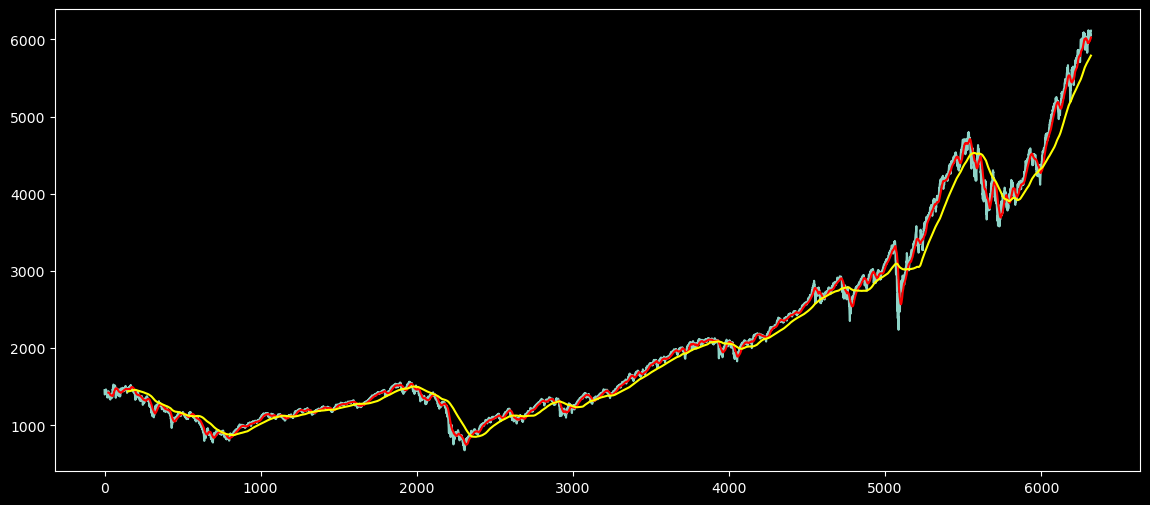

In [10]:
#draw graph
plt.figure(figsize=(14, 6))
plt.plot(price.Close)
plt.plot(price.Fast_MA, color="red")
plt.plot(price.Slow_MA, color="yellow")

plt.show()

In [11]:
#define entries
price['Long'] = price.Fast_MA > price.Slow_MA

price.tail()

Price,Date,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long
Ticker,,^GSPC,^GSPC,,,,,,,
6314,2025-02-10,6066.439941,6046.399902,1.006713,41687.442885,42046.632702,-359.189817,5999.667617,5777.364733,True
6315,2025-02-11,6068.500000,6049.319824,1.000340,41701.599223,42046.632702,-345.033479,6004.708809,5780.669066,True
6316,2025-02-12,6051.970215,6025.080078,0.997276,41588.009625,42046.632702,-458.623077,6007.772422,5783.835667,True
6317,2025-02-13,6115.069824,6060.589844,1.010426,42021.618362,42046.632702,-25.014340,6016.014023,5787.043398,True
6318,2025-02-14,6114.629883,6115.520020,0.999928,42018.595167,42046.632702,-28.037535,6023.869219,5790.577331,True


In [12]:
#calculate strategy balance
price['Strat_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1)

price.head(830)

Price,Date,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Strat_Ret
Ticker,,^GSPC,^GSPC,,,,,,,,
0,2000-01-03,1455.219971,1469.250000,NaN,NaN,NaN,NaN,NaN,NaN,False,1.000000
1,2000-01-04,1399.420044,1455.219971,0.961655,9616.553319,9616.553319,0.000000,NaN,NaN,False,1.000000
2,2000-01-05,1402.109985,1399.420044,1.001922,9635.038094,9635.038094,0.000000,NaN,NaN,False,1.000000
3,2000-01-06,1403.449951,1402.109985,1.000956,9644.246089,9644.246089,0.000000,NaN,NaN,False,1.000000
4,2000-01-07,1441.469971,1403.449951,1.027090,9905.512567,9905.512567,0.000000,NaN,NaN,False,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
825,2003-04-17,893.580017,879.909973,1.015536,6140.515077,10496.419728,-4355.904651,872.216396,872.368868,False,1.000000
826,2003-04-21,892.010010,893.580017,0.998243,6129.726280,10496.419728,-4366.693448,874.565996,872.383535,True,1.000000
827,2003-04-22,911.369995,892.010010,1.021704,6262.764486,10496.419728,-4233.655243,876.509197,872.518668,True,1.021704


In [13]:
#calculate strategy balance
price['Strat_Bal'] = STARTING_BALANCE * price.Strat_Ret.cumprod()

price.head()

Price,Date,Close,Open,Return,Bench_Bal,Bench_Peak,Bench_DD,Fast_MA,Slow_MA,Long,Strat_Ret,Strat_Bal
Ticker,,^GSPC,^GSPC,,,,,,,,,
0,2000-01-03,1455.219971,1469.250000,NaN,NaN,NaN,NaN,NaN,NaN,False,1.0,10000.0
1,2000-01-04,1399.420044,1455.219971,0.961655,9616.553319,9616.553319,0.0,NaN,NaN,False,1.0,10000.0
2,2000-01-05,1402.109985,1399.420044,1.001922,9635.038094,9635.038094,0.0,NaN,NaN,False,1.0,10000.0
3,2000-01-06,1403.449951,1402.109985,1.000956,9644.246089,9644.246089,0.0,NaN,NaN,False,1.0,10000.0
4,2000-01-07,1441.469971,1403.449951,1.027090,9905.512567,9905.512567,0.0,NaN,NaN,False,1.0,10000.0


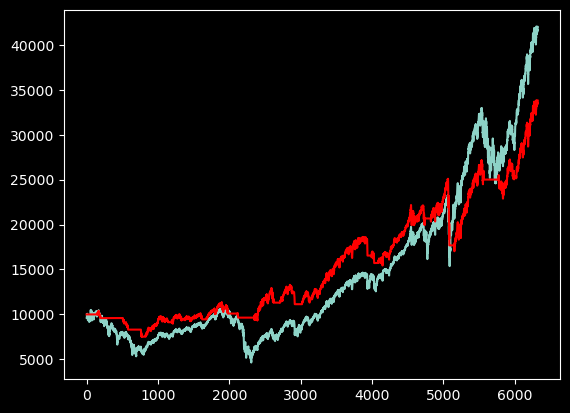

In [14]:
plt.plot(price.Bench_Bal)
plt.plot(price.Strat_Bal, color="red")

plt.show()

In [15]:
#calculate drawdown
price['Strat_Peak'] = price.Strat_Bal.cummax()

price['Strat_DD'] = price.Strat_Bal - price.Strat_Peak

strat_dd = round((((price.Strat_DD / price.Strat_Peak).min()) * 100), 2)

print(strat_dd)

-32.14


In [16]:
#calculate metrics
bench_return = round(((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1])**(1/YEARS))-1)*100), 2)
strat_return = round(((price.Strat_Bal.iloc[-1]/price.Strat_Bal.iloc[0]) - 1) * 100, 2)
strat_cagr = round(((((price.Strat_Bal.iloc[-1]/price.Strat_Bal.iloc[0])**(1/YEARS))-1)*100), 2)
strat_tim = round((price.Long.sum() / price.shape[0]) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'Strat Total return: {strat_return}%')
print(f'Strat CAGR: {strat_cagr}')
print(f'Strat DD: {strat_dd}%')
print(f'Strat Time in the Market: {strat_tim}%')

Benchmark Total return: 336.94%
Benchmark CAGR: 6.04
Benchmark DD: -56.78%

Strat Total return: 238.15%
Strat CAGR: 4.96
Strat DD: -32.14%
Strat Time in the Market: 68.4%


In [17]:
# Initialize variables once again for backtest
price = yf.download(ticker, start=START, end=END)
price = price.drop(['High', 'Low', 'Volume'], axis=1).reset_index()

# Daily return
price['Return'] = price.Close / price.Close.shift(1)

price.tail()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,Open,Return
Ticker,,^GSPC,^GSPC,
6314,2025-02-10,6066.439941,6046.399902,1.006713
6315,2025-02-11,6068.500000,6049.319824,1.000340
6316,2025-02-12,6051.970215,6025.080078,0.997276
6317,2025-02-13,6115.069824,6060.589844,1.010426
6318,2025-02-14,6114.629883,6115.520020,0.999928


In [18]:
# Function to perform backtesting
def backtest(price, MA_FAST, MA_SLOW):
    # Calculate moving averages
    price['Fast_MA'] = price.Close.rolling(window=MA_FAST).mean()
    price['Slow_MA'] = price.Close.rolling(window=MA_SLOW).mean()
    price['Long'] = price.Fast_MA > price.Slow_MA
    price['Strat_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)
    price['Strat_Balance'] = STARTING_BALANCE * price.Strat_Return.cumprod()
    
    # Debug
    print(f"Fast MA: {MA_FAST}, Slow MA: {MA_SLOW}, Final Balance: {price['Strat_Balance'].iloc[-1]}")
    
    # Make sure first output is working
    if price['Strat_Balance'].iloc[0] > 0:
        cagr_strat = (((price.Strat_Balance.iloc[-1] / price.Strat_Balance.iloc[0]) ** (1 / YEARS)) - 1) * 100
    else:
        cagr_strat = 0
    
    return cagr_strat

In [19]:
# Define periods for moving averages
periods_slow = list(range(140, 351, 5))
periods_fast = list(range(5, 136, 5))

results_full = []

# Run backtest for different MA periods
for slow in periods_slow:
    results = []
    for fast in periods_fast:
        result = backtest(price.copy(), fast, slow) 
        results.append(result)
    results_full.append(results)

results_full

Fast MA: 5, Slow MA: 140, Final Balance: 38081.9707720419
Fast MA: 10, Slow MA: 140, Final Balance: 38582.70324072446
Fast MA: 15, Slow MA: 140, Final Balance: 39819.255913375986
Fast MA: 20, Slow MA: 140, Final Balance: 32877.12789345277
Fast MA: 25, Slow MA: 140, Final Balance: 32328.099553388674
Fast MA: 30, Slow MA: 140, Final Balance: 34563.12611416865
Fast MA: 35, Slow MA: 140, Final Balance: 33688.04655143176
Fast MA: 40, Slow MA: 140, Final Balance: 40595.274858937475
Fast MA: 45, Slow MA: 140, Final Balance: 39253.43692609104
Fast MA: 50, Slow MA: 140, Final Balance: 47576.538166820385
Fast MA: 55, Slow MA: 140, Final Balance: 46448.85408680296
Fast MA: 60, Slow MA: 140, Final Balance: 44194.654685109104
Fast MA: 65, Slow MA: 140, Final Balance: 34254.51829227077
Fast MA: 70, Slow MA: 140, Final Balance: 32739.15615845513
Fast MA: 75, Slow MA: 140, Final Balance: 36935.02326416724
Fast MA: 80, Slow MA: 140, Final Balance: 37728.79377777825
Fast MA: 85, Slow MA: 140, Final Bala

[[5.460446661006424,
  5.515236397352186,
  5.6476673404323385,
  4.846003435416413,
  4.775824095001147,
  5.054688961072484,
  4.947626936244531,
  5.72877428079448,
  5.587567276549743,
  6.397978175833141,
  6.296547438532629,
  6.086501122518673,
  5.017232372213853,
  4.828473719234561,
  5.332295215144289,
  5.421384702506105,
  5.079223660708876,
  5.768914377530465,
  5.591098002620898,
  5.888822003191363,
  5.906695770162784,
  6.065397001884731,
  5.048479321783006,
  5.714797201305477,
  6.313812830281296,
  7.367214776295716,
  5.007330694496326],
 [5.960918774902324,
  5.777704311421927,
  5.692322927998883,
  4.987306184144913,
  5.057083954673947,
  5.205667771849765,
  5.189509903383982,
  5.908994235533593,
  5.778952948691751,
  6.165761303858308,
  6.131339811552228,
  5.997092779356383,
  5.217666012169775,
  4.984471163957926,
  5.9428676844289985,
  5.817064486227519,
  4.8137188049197865,
  5.638465055792796,
  5.751004181656039,
  5.970503739016242,
  6.171524

<Axes: >

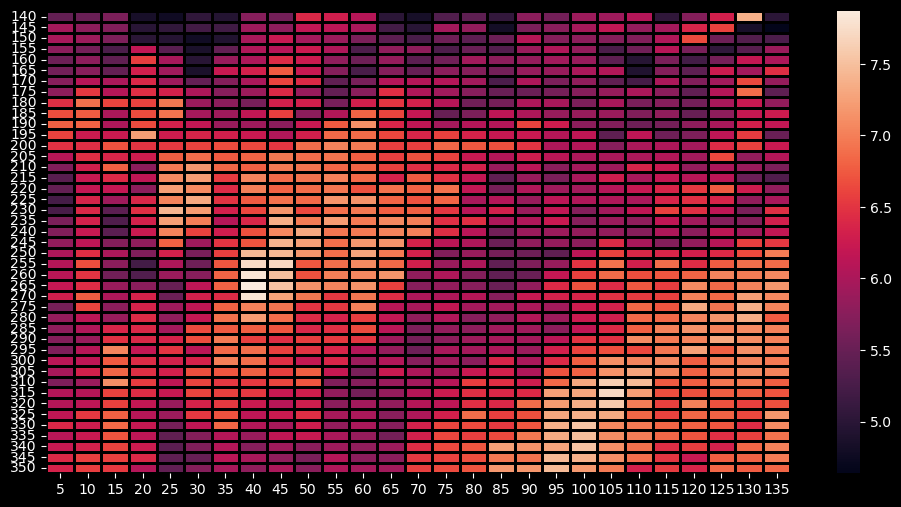

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(results_full,
            xticklabels=periods_fast,
            yticklabels=periods_slow,
            linewidth=1,
            linecolor="black"
           )

In [21]:
max_cagr = max(list(map(max, results_full)))

#print(list(enumerate(results_full)))

for slow, fast in enumerate(results_full):
    if max_cagr in fast:
        f = results_full[slow].index(max_cagr)
        s = slow

print(f'\nFast MA: {periods_fast[f]}')
print(f'Slow MA: {periods_slow[s]}')
print(f'CAGR: {round(results_full[s][f], 2)}%')


Fast MA: 40
Slow MA: 265
CAGR: 7.87%


In [22]:
class MovingAverageCrossover:

    def __init__(self, ticker, start_date, end_date, fast_ma, slow_ma, initial_balance):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.fast_ma = fast_ma
        self.slow_ma = slow_ma
        self.initial_balance = initial_balance
        self.data = None
        
    def fetch_data(self):
        self.data = yf.download(self.ticker, start=self.start_date, end=self.end_date)
        self.data = self.data[['Close']].reset_index()
        return self.data
    
    def calculate_indicators(self):
        self.data['Fast_MA'] = self.data['Close'].rolling(window=self.fast_ma).mean()
        self.data['Slow_MA'] = self.data['Close'].rolling(window=self.slow_ma).mean()
        
    def generate_signals(self):
        self.data['Signal'] = 0 
        self.data.loc[self.data['Fast_MA'] > self.data['Slow_MA'], 'Signal'] = 1 
        
    def calculate_returns(self):
        # Daily returns
        self.data['Return'] = self.data['Close'].pct_change()
        
        # Strategy returns
        self.data['Strat_Return'] = self.data['Signal'].shift(1) * self.data['Return']

        # Cumulative balance
        self.data['Cumulative_Return'] = (1 + self.data['Strat_Return']).cumprod()
        self.data['Strat_Curve'] = self.initial_balance * self.data['Cumulative_Return']

        # Benchmark balance
        self.data['Bench_Curve'] = self.initial_balance * (1 + self.data['Return']).cumprod()
        
        
    def calculate_metrics_b(self):
        # Annual Return
        total_years = (self.end_date - self.start_date).days / 365.25
        total_return_b = (self.data['Bench_Curve'].iloc[-1] / self.initial_balance) - 1
                          
        cagr_b = (1 + total_return_b) ** (1 / total_years) - 1
        
        # Maximum Drawdown
        peak_b = self.data['Bench_Curve'].expanding(min_periods=1).max()
        drawdown_b = (self.data['Bench_Curve'] - peak_b) / peak_b
        max_drawdown_b = drawdown_b.min()
        
        return {
            'Bench Total Return': round(total_return_b * 100, 2),
            'Bench CAGR': round(cagr_b * 100, 2),
            'Bench Max Drawdown': round(max_drawdown_b * 100, 2)
        }
        
    def calculate_metrics_s(self):
        # Annual Return
        total_years = (self.end_date - self.start_date).days / 365.25
        total_return_s = (self.data['Strat_Curve'].iloc[-1] / self.initial_balance) - 1
                          
        cagr_s = (1 + total_return_s) ** (1 / total_years) - 1
        
        # Maximum Drawdown
        peak_s = self.data['Strat_Curve'].expanding(min_periods=1).max()
        drawdown_s = (self.data['Strat_Curve'] - peak_s) / peak_s
        max_drawdown_s = drawdown_s.min()
        
        return {
            'Strategy Total Return': round(total_return_s * 100, 2),
            'Strategy CAGR': round(cagr_s * 100, 2),
            'Strategy Max Drawdown': round(max_drawdown_s * 100, 2),
        }
    
    def plot_results(self):
        fig, (p1, p2) = plt.subplots(2, 1, figsize=(15, 10))
        
        # Plot price and moping aperages
        p1.plot(self.data['Close'], label='Price')
        p1.plot(self.data['Fast_MA'], label=f'{self.fast_ma} MA', color='red')
        p1.plot(self.data['Slow_MA'], label=f'{self.slow_ma} MA', color='yellow')
        p1.set_title('Price and Moving Averages')
        p1.legend()
        
        # Plot Strategy and Bench curve
        p2.plot(self.data['Bench_Curve'], label=self.ticker)
        p2.plot(self.data['Strat_Curve'], label='Strategy', color='red')
        p2.set_title('Strategy vs Stock Performance')
        p2.legend()
        
        plt.tight_layout()
        plt.show()
        
    def run_strategy(self):
        self.fetch_data()
        self.calculate_indicators()
        self.generate_signals()
        self.calculate_returns()
        metrics_b = self.calculate_metrics_b()
        metrics_s = self.calculate_metrics_s()
        self.plot_results()
        return '[' + str(self.fast_ma) + ',' + str(self.slow_ma) + ']\n' + str(metrics_b) + '\n' + str(metrics_s)

[*********************100%***********************]  1 of 1 completed


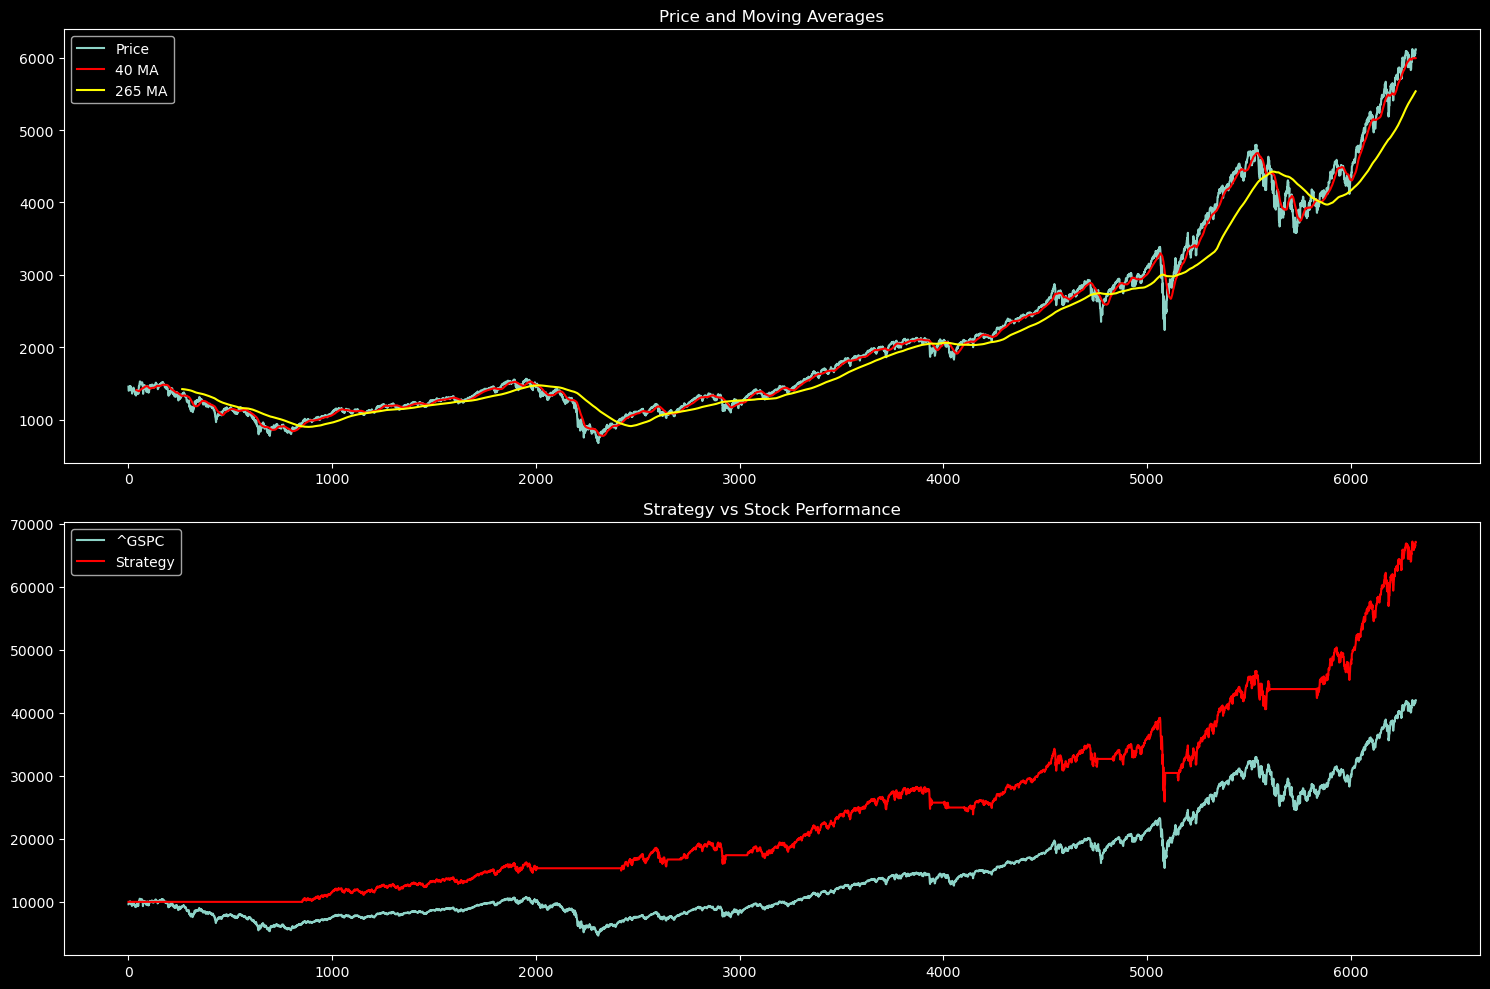

[40,265]
{'Bench Total Return': 320.19, 'Bench CAGR': 5.88, 'Bench Max Drawdown': -56.78}
{'Strategy Total Return': 571.54, 'Strategy CAGR': 7.87, 'Strategy Max Drawdown': -33.92}


In [23]:
# Create strategy instance
strategy = MovingAverageCrossover(
    ticker=ticker,
    start_date=START,
    end_date=END,
    fast_ma=periods_fast[f],
    slow_ma=periods_slow[s],
    initial_balance=10000
)

# Run strategy and get results
results = strategy.run_strategy()
print(results)

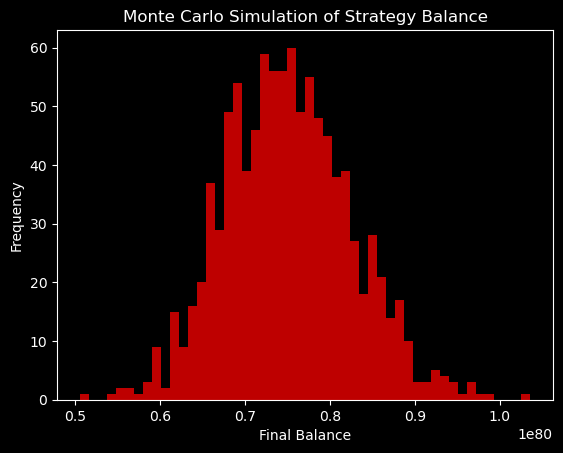

In [24]:
from scipy.stats import norm

# Monte Carlo simulation for future prices
def monte_carlo_simulation(price, simulations=1000, days=252):
    returns = price['Return'].dropna()
    results = []

    for _ in range(simulations):
        simulated_returns = np.random.choice(returns, size=days, replace=True)
        simulated_balance = STARTING_BALANCE * (1 + simulated_returns).cumprod()
        results.append(simulated_balance[-1])

    return results

# Run simulation
sim_results = monte_carlo_simulation(price)

# Plot results
plt.hist(sim_results, bins=50, color='red', alpha=0.75)
plt.title('Monte Carlo Simulation of Strategy Balance')
plt.xlabel('Final Balance')
plt.ylabel('Frequency')
plt.show()